In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
from citipy import citipy

In [5]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
        
# Print the city count to confirm sufficient count.
len(cities)
#print(cities)

638

In [6]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [7]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
#for i in range(len(cities)):

    # Group cities in sets of 50 for logging purposes.
#    if (i % 50 == 0 and i >= 50):
#        set_count += 1
#        record_count = 1
#        time.sleep(60)

    # Create endpoint URL with each city.
#    city_url = url + "&q=" + cities[i]
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | chagda
City not found. Skipping...
Processing Record 2 of Set 1 | bereda
Processing Record 3 of Set 1 | hobart
Processing Record 4 of Set 1 | kargat
Processing Record 5 of Set 1 | sarkand
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | north salt lake
Processing Record 8 of Set 1 | ancud
Processing Record 9 of Set 1 | barentsburg
City not found. Skipping...
Processing Record 10 of Set 1 | faya
Processing Record 11 of Set 1 | saskylakh
Processing Record 12 of Set 1 | nguiu
City not found. Skipping...
Processing Record 13 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 14 of Set 1 | ushuaia
Processing Record 15 of Set 1 | acarau
Processing Record 16 of Set 1 | cherskiy
Processing Record 17 of Set 1 | kodiak
Processing Record 18 of Set 1 | lewistown
Processing Record 19 of Set 1 | marzuq
Processing Record 20 of Set 1 | sentyabrskiy
City not found. Skipping...
P

Processing Record 36 of Set 4 | sitka
Processing Record 37 of Set 4 | cherechiu
Processing Record 38 of Set 4 | turinskaya sloboda
Processing Record 39 of Set 4 | catuday
Processing Record 40 of Set 4 | sisimiut
Processing Record 41 of Set 4 | bhag
Processing Record 42 of Set 4 | singkang
Processing Record 43 of Set 4 | flinders
Processing Record 44 of Set 4 | paita
Processing Record 45 of Set 4 | one hundred mile house
City not found. Skipping...
Processing Record 46 of Set 4 | tiksi
Processing Record 47 of Set 4 | pahrump
Processing Record 48 of Set 4 | dongsheng
Processing Record 49 of Set 4 | erdenet
Processing Record 50 of Set 4 | rogun
City not found. Skipping...
Processing Record 1 of Set 5 | berlevag
Processing Record 2 of Set 5 | durant
Processing Record 3 of Set 5 | mahon
Processing Record 4 of Set 5 | denpasar
Processing Record 5 of Set 5 | kyaukse
Processing Record 6 of Set 5 | jega
Processing Record 7 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 8 

Processing Record 24 of Set 8 | fort-shevchenko
Processing Record 25 of Set 8 | esmeraldas
Processing Record 26 of Set 8 | diamantino
Processing Record 27 of Set 8 | mouzakion
City not found. Skipping...
Processing Record 28 of Set 8 | partenit
Processing Record 29 of Set 8 | aksu
Processing Record 30 of Set 8 | krosno
Processing Record 31 of Set 8 | vylkove
Processing Record 32 of Set 8 | owando
Processing Record 33 of Set 8 | kasane
Processing Record 34 of Set 8 | ngukurr
City not found. Skipping...
Processing Record 35 of Set 8 | omsukchan
Processing Record 36 of Set 8 | garden city
Processing Record 37 of Set 8 | talnakh
Processing Record 38 of Set 8 | khasan
Processing Record 39 of Set 8 | ketchikan
Processing Record 40 of Set 8 | huejucar
Processing Record 41 of Set 8 | xining
Processing Record 42 of Set 8 | salinopolis
Processing Record 43 of Set 8 | port macquarie
Processing Record 44 of Set 8 | onega
Processing Record 45 of Set 8 | thinadhoo
Processing Record 46 of Set 8 | iwa

City not found. Skipping...
Processing Record 16 of Set 12 | christchurch
Processing Record 17 of Set 12 | avera
Processing Record 18 of Set 12 | cumana
Processing Record 19 of Set 12 | erzin
Processing Record 20 of Set 12 | melchor de mencos
Processing Record 21 of Set 12 | faanui
Processing Record 22 of Set 12 | valle del guamuez
Processing Record 23 of Set 12 | daud khel
Processing Record 24 of Set 12 | jackson
Processing Record 25 of Set 12 | vao
Processing Record 26 of Set 12 | miri
Processing Record 27 of Set 12 | hearst
Processing Record 28 of Set 12 | leshukonskoye
Processing Record 29 of Set 12 | vanimo
Processing Record 30 of Set 12 | kyra
Processing Record 31 of Set 12 | berezovka
Processing Record 32 of Set 12 | shingu
Processing Record 33 of Set 12 | bani
Processing Record 34 of Set 12 | verkhovazhye
Processing Record 35 of Set 12 | sai buri
Processing Record 36 of Set 12 | balkhash
Processing Record 37 of Set 12 | west odessa
Processing Record 38 of Set 12 | bajil
Process

In [8]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)

new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Bereda,ES,2022-07-19 23:47:03,43.2686,-7.5406,57.92,94,41,2.89
1,Hobart,AU,2022-07-19 23:47:04,-42.8794,147.3294,42.06,85,20,8.05
2,Kargat,RU,2022-07-19 23:47:04,55.1956,80.2811,58.71,77,73,4.76
3,Sarkand,KZ,2022-07-19 23:47:04,45.4100,79.9186,62.08,40,22,6.35
4,Bluff,NZ,2022-07-19 23:47:05,-46.6000,168.3333,45.81,69,93,11.03
5,North Salt Lake,US,2022-07-19 23:45:33,40.8486,-111.9069,94.24,28,40,14.97
6,Ancud,CL,2022-07-19 23:47:06,-41.8697,-73.8203,52.23,95,100,19.53
7,Faya,SA,2022-07-19 23:47:06,18.3851,42.4509,68.52,55,100,4.65
8,Saskylakh,RU,2022-07-19 23:47:07,71.9167,114.0833,42.06,65,100,15.39
9,Ushuaia,AR,2022-07-19 23:43:22,-54.8000,-68.3000,38.86,81,75,4.61


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [11]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1658275402.314463

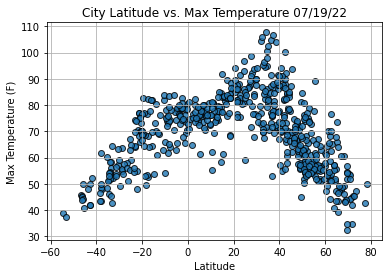

In [12]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

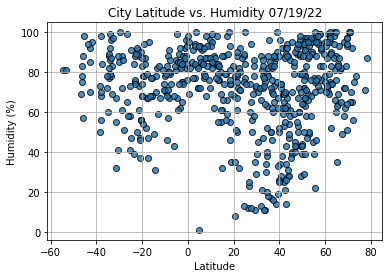

In [13]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()


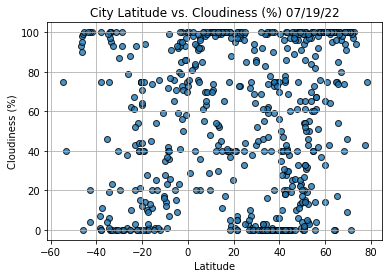

In [14]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


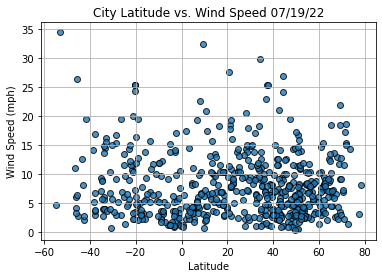

In [15]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()


In [16]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [17]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

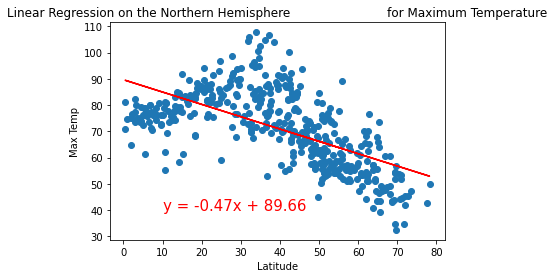

In [18]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

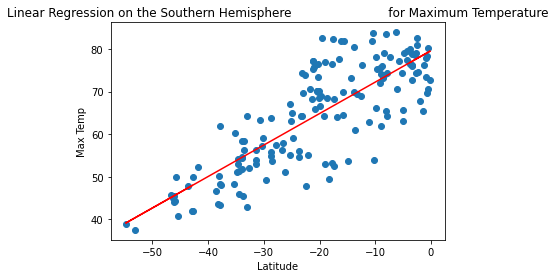

In [19]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

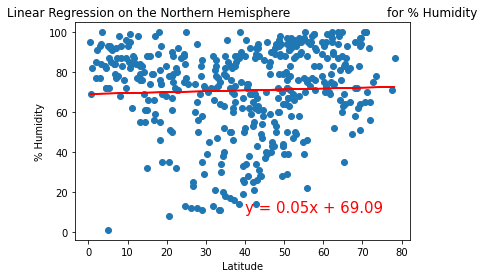

In [20]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

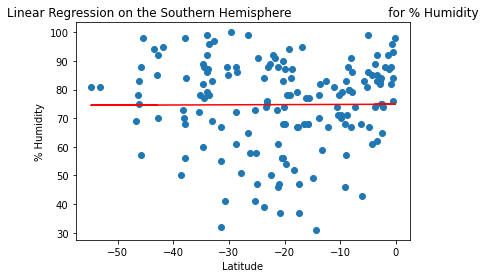

In [21]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

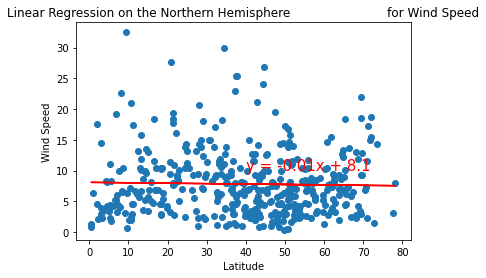

In [22]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

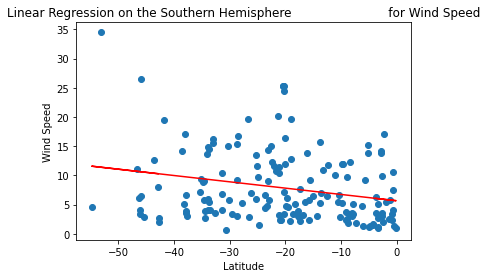

In [23]:
# Linear regression on the Northern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,10))

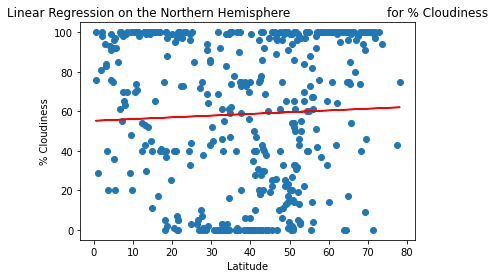

In [25]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

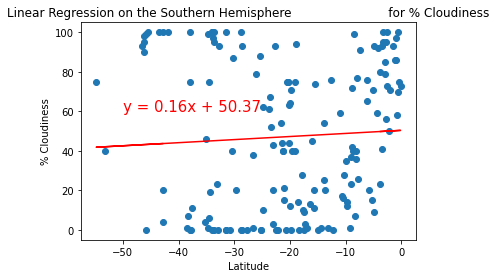

In [26]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

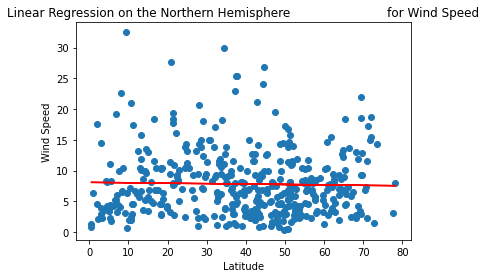

In [27]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

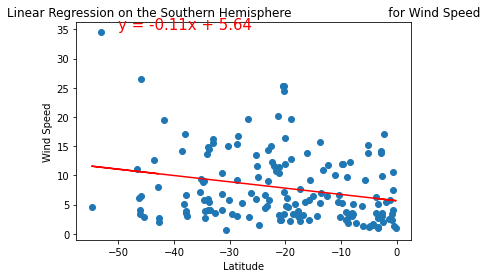

In [28]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))